In [1]:
import cPickle as pickle
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import CAM_NWB as cn
from skimage.morphology import label
from skimage.measure import regionprops

%matplotlib inline

In [2]:
#path = ('/Volumes/Brain2015/CAM/') # change path to where the CAM data is
pklfile = open('CAM_Meta.pkl','r') # importing the compiled CAM meta data
CAM_Meta = pickle.load(pklfile)
pklfile.close()
CAM_Meta.columns

Index([u'lims_id', u'HVA', u'specimen', u'system', u'depth', u'Cre',
       u'MeanRunSpeed'],
      dtype='object')

In [12]:
#cn.getMetaData('/Users/etaralova/data/CAM/482923718.nwb')
pickle.load('')

Help on package pandas:

NAME
    pandas

FILE
    //anaconda/lib/python2.7/site-packages/pandas/__init__.py

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    See http://pandas.sourceforge.net for full documentation. Otherwise, see the
    docstrings of the various objects in the pandas namespace:
    
    Series
    DataFrame
    Panel
    Index
    DatetimeIndex
    HDFStore
    bdate_range
    date_range
    read_csv
    read_fwf
    read_table
    ols

PACKAGE CONTENTS
    _period
    _sparse
    _testing
    algos
    compat (package)
    computation (package)
    core (package)
    hashtable
    index
    info
    io (package)
    json
    lib
    msgpack
    parser
    rpy (package)
    sandbox (package)
    sparse (package)
    stats (package)
    tests (package)
    tools (package)
    tseries (package)
    tslib
    util (package)
    version

SUBMODULES
    datetools
    offsets

DATA
    IndexSlice = <pandas.core.indexing._Index

In [3]:
experiment_ids = list(CAM_Meta.lims_id)

In [3]:
#extract the ROI locations:
for exp in experiment_ids:
    path = '/Volumes/Brain2015/CAM/' + exp + '.nwb'
    print "working on: " + path
    masks = cn.getROImask(path)
    frames_N, ROWS, COLS = masks.shape
    ALL_MASKS = np.ndarray((ROWS, COLS),dtype=np.int32)
    centroids = np.ndarray((frames_N,2), dtype=int)
    for f in np.arange(frames_N):
        p = regionprops(masks[f,:,:]!= 0)
        centroids[f,...] = np.round(p[0].centroid)
    np.savetxt('rois_' + exp + '.txt', centroids, fmt='%d',  delimiter=',')
    
print "Done with all experiments. :)"

working on: /Users/etaralova/data/CAM/479182359.nwb
working on: /Users/etaralova/data/CAM/479214697.nwb
working on: /Users/etaralova/data/CAM/479681980.nwb
working on: /Users/etaralova/data/CAM/479720699.nwb


KeyboardInterrupt: 

In [4]:
CAM_Meta

,lims_id,HVA,specimen,system,depth,Cre,MeanRunSpeed
0,479182359,V1,169227,2p1,400,Emx1,1.080164
1,479214697,RL,169227,2p1,175,Emx1,26.54746
2,479681980,V1,180818,2p2,175,Emx1,2.165232
3,479720699,V1,180818,2p2,275,Emx1,1.171391
4,479995614,V1,182199,2p2,275,Emx1,-0.03743339
5,480152974,V1,182475,2p1,275,Slc17a7,0.005974247
6,482591434,LM,182638,2p2,175,Emx1,0.2445702
7,482923718,V1,185282,2p1,175,Cux2,0.009398528
8,482924833,V1,185282,2p1,275,Cux2,0.1774804
9,483020038,LM,185282,2p1,175,Cux2,0.06361942


In [124]:
#we are analyzing only this mouse: 185282
allROIS = np.load('/Volumes/Brain2015/Steph/allROIs_185282.npy')
#CAM_Meta.lims_id[ np.where(CAM_Meta.specimen=='185282') ]
a = np.where(CAM_Meta.specimen.values =='185282')
a = a[0]
EXPT_IDS = CAM_Meta.lims_id[a].values

In [8]:
stim_table = cn.getStimulusTable('/Users/etaralova/data/CAM/479182359.nwb')
np.unique(stim_table.orientation)

array([   0.,   45.,   90.,  135.,  180.,  225.,  270.,  315.,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan], dtype=float32)

In [509]:
EXPT_N = len(allROIS)
for expt_id in range(EXPT_N):
    print "Running experiment: ", expt_id
    e_string = EXPT_IDS[expt_id].tostring()
    stim_table = cn.getStimulusTable('/Users/etaralova/data/CAM/' + e_string + '.nwb')
    #nan to negative:
    orient_values = stim_table.orientation.fillna(-10)
    orient_values = orient_values.astype(int)
    orient_U = np.unique(orient_values)

    temporal_values = stim_table.temporal_frequency.fillna(-10)
    temporal_values = temporal_values.astype(int)
    temporal_U = np.unique(temporal_values)
     
    ROIS_N, junk1, junk2 =  allROIS[expt_id].shape
    #allROIS[expt_id].shape

    data = np.ndarray((ROIS_N,0))
    orient_labels = np.ndarray((1,1),dtype=int)
    freq_labels = np.ndarray((1,1),dtype=int)
    #print data.shape
    for o in orient_U:
        if(o >= 0):
            print "orientation ", o
            ii = np.where(orient_values == o)[0]
            samples_N = len(ii)
            #Kate: verified this is indeed the way to properly concatenate the data
            d = allROIS[expt_id][...,ii,...]
            d = d.squeeze()
            d = np.reshape(d, (ROIS_N,90*samples_N))
            orient_labels = np.concatenate((orient_labels, np.ones((1,90*samples_N),dtype=int)*o), axis=1)
            #temp_freq = np.ndarray((1,1),dtype=int)
            for t in temporal_values[ii]:
                #print t
                #temp_freq = np.concatenate( (temp_freq, np.ones((1,90))*t),axis=1)
                freq_labels = np.concatenate((freq_labels, np.ones((1,90))*t),axis=1)
            #print d.shape
            data = np.concatenate((data,d),axis=1)
            #print  samples_N, d.shape,data.shape, orient_labels.shape, freq_labels.shape
    freq_labels = freq_labels[0,1:]
    orient_labels = orient_labels[0,1:]
    #print freq_labels.shape, orient_labels.shape, data.shape
    #print orient_values.shape, temporal_values.shape
    print "Saving orient, freq labels and data: ", orient_labels.shape, freq_labels.shape, data.shape
    np.savetxt('data_' + e_string + '.csv', data, fmt='%0.2f',  delimiter=',')
    np.savetxt('olabels_' + e_string + '.csv', orient_labels, fmt='%d',  delimiter=',')
    np.savetxt('flabels_' + e_string + '.csv', freq_labels, fmt='%d',  delimiter=',')
    print "DONE: experiment: ", expt_id

Running experiment:  0
orientation  0
75 (497, 6750) (497, 6750) (1, 6751) (1, 6751)
orientation  45
75 (497, 6750) (497, 13500) (1, 13501) (1, 13501)
orientation  90
75 (497, 6750) (497, 20250) (1, 20251) (1, 20251)
orientation  135
75 (497, 6750) (497, 27000) (1, 27001) (1, 27001)
orientation  180
75 (497, 6750) (497, 33750) (1, 33751) (1, 33751)
orientation  225
75 (497, 6750) (497, 40500) (1, 40501) (1, 40501)
orientation  270
75 (497, 6750) (497, 47250) (1, 47251) (1, 47251)
orientation  315
75 (497, 6750) (497, 54000) (1, 54001) (1, 54001)
(54000,) (54000,) (497, 54000)
(630,) (630,)
Saving orient, freq labels and data:  (54000,) (54000,) (497, 54000)
DONE: experiment:  0
Running experiment:  1
orientation  0
75 (387, 6750) (387, 6750) (1, 6751) (1, 6751)
orientation  45
75 (387, 6750) (387, 13500) (1, 13501) (1, 13501)
orientation  90
75 (387, 6750) (387, 20250) (1, 20251) (1, 20251)
orientation  135
75 (387, 6750) (387, 27000) (1, 27001) (1, 27001)
orientation  180
75 (387, 675

(90,)


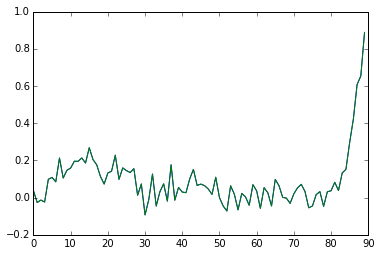

In [183]:
#sanity check: these two should be exactly the same if concatenated properly:
print allROIS[expt_id][...,2,1,...].squeeze().shape
plt.plot(allROIS[expt_id][...,2,1,...].squeeze())
plt.plot(data[2,0:90])